# Web scraping Altimetrias.net

## 1. Definiendo una función para el scraping con BeautifulSoup.

In [1]:
#Altimetrias.net usa un código de tres dígitos del 001 al 766 para identificar los puertos.
#Para automatizar nuestro scraping primero obtenemos la url base:

base_url_puerto = 'https://www.altimetrias.net/aspbk/verPuerto.asp?id='

#La url completa se compone de la url base y el código de puerto (001,002,003...).

In [2]:
#Importando requests y Beautifulsoup para parsear la web.

import requests
from bs4 import BeautifulSoup

In [3]:
#Asignamos una variable a la url del primer puerto sobre la cual ejecutaremos las primeras pruebas de scraping. 
#A continuación extraemos el texto html del link y lo parseamos.

puerto = '001'

url = f'{base_url_puerto}{puerto}'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

In [4]:
#Dado que el código se compone de múltiples tablas sin clase, emplearemos los índices para acceder a su contenido.
#En esta primera tabla encontramos la provincia, nombre del puerto y localidad:

tabla_0 = soup.find_all('table')[0]
tabla_0

<table align="center" bgcolor="#000000" cellpadding="5" cellspacing="1" width="100%">
<tr>
<td align="center" id="provincias" nowrap="" width="15%">
<img border="0" height="84" src="imagenes/4Bizkaia.png" width="112"/><font color="#F97771">BIZKAIA</font></td>
<td align="center" width="75%"><font color="#FFCC00" size="6"><b>NABARNIZ</b></font><br/><font color="#FFFFFF" size="5"><b>Aulesti-Narea</b></font><!-- <a class="LinkGorri" href="../asppdf/importare/importare.asp?id=1&nombre=Nabarniz">&nbsp;</a> --></td>
<td align="center" width="15%"><a href="../default.asp"><img border="0" src="../imagenes/verPuerto.jpg"/></a><font color="#FFFF00" size="3"><b>15814</b></font> <font color="#C0C0C0" size="3"><b>visitas</b></font></td>
</tr>
</table>

In [5]:
#En esta segunda tabla veremos altitud, distancia, desnivel, pendiente y coeficiente.

tabla_1 = soup.find_all('table')[1]
tabla_1

<table align="center" bgcolor="#000000" cellpadding="5" cellspacing="1" width="100%">
<tr align="center" bgcolor="#DDDDDD">
<td nowrap="" width="1%"><img alt="" border="0" height="25" src="imagenes/xaltitud.png" width="25"/> <font size="3"><b>Altitud: </b>365 m</font></td>
<td nowrap="" width="1%"><img alt="" border="0" height="25" src="imagenes/xdistancia.png" width="25"/> <font size="3"><b>Distancia:</b> 4,4 km</font></td>
<td nowrap="" width="1%"><img alt="" border="0" height="25" src="imagenes/xdesnivel.png" width="25"/> <font size="3"><b>Desnivel:</b> 273 m</font></td>
<td nowrap="" width="1%"><img alt="" border="0" height="25" src="imagenes/xpendiente.png" width="25"/> <font size="3"><b>Pendiente Media: </b>6,2 %</font></td>
<td nowrap="" width="1%"><font size="3"><b>Coeficiente: </b><font color="red"><b>81</b></font></font></td>
</tr>
</table>

In [6]:
#Veamos qué celdas contienen los valores que buscamos, empezaremos por recogerlas todas.

filas_0 = tabla_0.find_all('td')

In [7]:
#Igual que con las tablas, accedemos a las celdas mediante sus índices. Aquí vemos la información de provincia.

filas_0[0] 

<td align="center" id="provincias" nowrap="" width="15%">
<img border="0" height="84" src="imagenes/4Bizkaia.png" width="112"/><font color="#F97771">BIZKAIA</font></td>

In [8]:
#Población y puerto.

filas_0[1] 

<td align="center" width="75%"><font color="#FFCC00" size="6"><b>NABARNIZ</b></font><br/><font color="#FFFFFF" size="5"><b>Aulesti-Narea</b></font><!-- <a class="LinkGorri" href="../asppdf/importare/importare.asp?id=1&nombre=Nabarniz">&nbsp;</a> --></td>

In [9]:
#Haciendo strip para obtener la provincia:

filas_0[0].text.strip()

'BIZKAIA'

In [10]:
#Ahora el puerto:

filas_0[1].contents[0].text.strip()

'NABARNIZ'

In [11]:
#Y finalmente la población:

filas_0[1].contents[2].text.strip()

'Aulesti-Narea'

In [12]:
#Ahora vamos a seguir el mismo procedimiento para conseguir las cifras del puerto.

filas_1 = tabla_1.find_all('td')

In [13]:
#Altitud:

filas_1[0].contents[2].text.strip()

'Altitud: 365 m'

In [14]:
#Distancia:

filas_1[1].contents[2].text.strip()

'Distancia: 4,4 km'

In [15]:
#Desnivel:

filas_1[2].contents[2].text.strip()

'Desnivel: 273 m'

In [16]:
#Pendiente:

filas_1[3].contents[2].text.strip()

'Pendiente Media: 6,2 %'

In [17]:
#Coeficiente:

filas_1[4].contents[0].text.strip()

'Coeficiente: 81'

In [18]:
#Creando un diccionario del puerto 001:

import re

puerto = [{'puerto': filas_0[1].contents[0].text.strip(),
          'provincia': filas_0[0].text.strip(),
          'pueblo': filas_0[1].contents[2].text.strip(),
          'altitud': re.findall(r"\d+", filas_1[0].contents[2].text.strip())[0],
          'distancia': re.findall(r"\d+,\d", filas_1[1].contents[2].text.strip())[0],
          'desnivel': re.findall(r"\d+",filas_1[2].contents[2].text.strip())[0],
          'pendiente': re.findall(r"\d+,\d",filas_1[3].contents[2].text.strip())[0],
          'coeficiente': re.findall(r"\d+",filas_1[4].contents[0].text.strip())[0]}]

In [19]:
puerto

[{'puerto': 'NABARNIZ',
  'provincia': 'BIZKAIA',
  'pueblo': 'Aulesti-Narea',
  'altitud': '365',
  'distancia': '4,4',
  'desnivel': '273',
  'pendiente': '6,2',
  'coeficiente': '81'}]

In [20]:
#Sabiendo dónde está cada dato que nos interesa podemos definir una función para scrapear la url de cada puerto. 
#La primera parte del código se encarga de añadir ceros a la izquierda de la x hasta que la longitud es de 3 caracteres,
#ya que el input de la función no puede ser un dígito con ceros a la izquierda pero la url sí que lo necesita.

def scraper_puertos(x):
    if len(str(x)) == 1:    
        x = '00' + str(x)    #Si x tiene un dígito le añadimos dos ceros a la izquierda.
    elif len(str(x)) == 2:   #Si tiene dos dígitos sumamos un solo cero.
        x = '0' + str(x)
    else:
        pass                 #Si x tiene tres caracteres no hacemos nada.
    base_url_puerto = 'https://www.altimetrias.net/aspbk/verPuerto.asp?id=' #Cargando url base.
    url = f'{base_url_puerto}{x}'                                           #Creando la url del puerto.
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    tabla_0 = soup.find_all('table')[0]                                     #Creando las tablas y filas previamente mencionadas.
    tabla_1 = soup.find_all('table')[1]
    filas_0 = tabla_0.find_all('td')
    filas_1 = tabla_1.find_all('td')
    puerto = [{'puerto': filas_0[1].contents[0].text.strip(),              #Definiendo los valores del diccionario.
          'provincia': filas_0[0].text.strip(),
          'pueblo': filas_0[1].contents[2].text.strip(),
          'altitud': int(re.findall(r"\d+", filas_1[0].contents[2].text.strip())[0]),   #Usamos regex para obtener los valores
          'distancia': int(re.findall(r"\d+", filas_1[1].contents[2].text.strip())[0]), #numéricos y casteamos a int.
          'desnivel': int(re.findall(r"\d+",filas_1[2].contents[2].text.strip())[0]),
          'pendiente': int(re.findall(r"\d+",filas_1[3].contents[2].text.strip())[0]),
          'coeficiente': int(re.findall(r"\d+",filas_1[4].contents[0].text.strip())[0])}]
    return puerto               #Devolviendo el diccionario.
    print(puerto)

In [21]:
#Probamos la función con los 5 primeros puertos. Probando todos los rangos (de 001 a 766) detectamos un importante problema,
#y es que faltan algunos puertos. Lo solventamos rápidamente mediante error handling.

for i in range(1,5):
    try:
        puerto_gen = scraper_puertos(i)
        print(puerto_gen)
    except:
        pass  

[{'puerto': 'NABARNIZ', 'provincia': 'BIZKAIA', 'pueblo': 'Aulesti-Narea', 'altitud': 365, 'distancia': 4, 'desnivel': 273, 'pendiente': 6, 'coeficiente': 81}]
[{'puerto': 'ANDRAKA', 'provincia': 'BIZKAIA', 'pueblo': 'Plentzia', 'altitud': 138, 'distancia': 3, 'desnivel': 129, 'pendiente': 3, 'coeficiente': 17}]
[{'puerto': 'ANDRAKA', 'provincia': 'BIZKAIA', 'pueblo': 'Asteintza (Jatabe/Maruri)', 'altitud': 138, 'distancia': 3, 'desnivel': 114, 'pendiente': 3, 'coeficiente': 15}]
[{'puerto': 'ARTEBAKARRA', 'provincia': 'BIZKAIA', 'pueblo': 'Derio', 'altitud': 137, 'distancia': 3, 'desnivel': 113, 'pendiente': 3, 'coeficiente': 15}]


## 2. Creando un DF con todos los puertos. 

In [22]:
#Importamos pandas y probamos a crear un dataframe a partir del primer puerto. Aquí sumaremos el resto.

import pandas as pd

df_puertos = pd.DataFrame.from_dict(scraper_puertos(1))
df_puertos.head()

,puerto,provincia,pueblo,altitud,distancia,desnivel,pendiente,coeficiente
0,NABARNIZ,BIZKAIA,Aulesti-Narea,365,4,273,6,81


In [23]:
#Ejecutamos la función para todo el rango de puertos, añadiendo cada diccionario de puerto a nuestro dataframe.

for i in range(2,766):
    try:
        puerto_gen = scraper_puertos(i)
        df_puertos = df_puertos.append(puerto_gen, ignore_index=True)
    except:
        pass 

In [24]:
#Ya tenemos nuestro dataframe poblado con todos los puertos de la web. Veamos sus características:

df_puertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   puerto       746 non-null    object
 1   provincia    746 non-null    object
 2   pueblo       746 non-null    object
 3   altitud      746 non-null    int64 
 4   distancia    746 non-null    int64 
 5   desnivel     746 non-null    int64 
 6   pendiente    746 non-null    int64 
 7   coeficiente  746 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 46.8+ KB


## 3. Data cleaning y generación del csv con todos los puertos de la península.

In [25]:
#Vemos que algunos puertos están aparentemente repetidos. Lo que sucede es que algunos puertos cuentan con una ascensión por dos
#o más caras, con sus correspondientes altimetrías y coeficientes de dureza. Ya que no todas las provincias tienen la misma
#proporción de puertos "múltiples", mantenerlos en el dataframe echaría al traste las conclusiones. Vamos a observar el problema:

df_puertos.sort_values('coeficiente', ascending=False, inplace=True)
df_puertos.head()

,puerto,provincia,pueblo,altitud,distancia,desnivel,pendiente,coeficiente
697,SIERRA NEVADA-PICO VELETA,GRANADA,Haza Llanas-Las Sabinas,3296,39,2527,6,616
387,SIERRA NEVADA-PICO VELETA,GRANADA,Güéjar Sierra,3367,44,2557,5,549
251,ANGLIRU,ASTURIAS,Santa Eulalia,1570,18,1423,7,528
268,ANGLIRU,ASTURIAS,La Vega (Riosa),1572,12,1266,10,515
453,GAMONITEIRO,ASTURIAS,Pola-Cobertoria,1772,15,1465,9,492


In [36]:
#Y aquí usaremos un simple drop_duplicates para prescindir de estos puertos. Hemos elegido mantener el primer puerto (el más
#duro) ya que va a ser el más relevante estadísticamente.

df_puertos.drop_duplicates(subset ="puerto", inplace = True)
df_puertos.head()

,puerto,provincia,pueblo,altitud,distancia,desnivel,pendiente,coeficiente
697,SIERRA NEVADA-PICO VELETA,GRANADA,Haza Llanas-Las Sabinas,3296,39,2527,6,616
251,ANGLIRU,ASTURIAS,Santa Eulalia,1570,18,1423,7,528
453,GAMONITEIRO,ASTURIAS,Pola-Cobertoria,1772,15,1465,9,492
403,ROQUE DE LOS MUCHACHOS,SC DE TENERIFE,Garafía,2400,29,2164,7,477
148,TEIDE,SC DE TENERIFE,Santa Cruz,2325,63,2308,3,474


In [45]:
index_puertos = df_puertos[ df_puertos['provincia'] == 'SC DE TENERIFE' ].index

In [46]:
df_puertos.drop(index_puertos, inplace = True)

In [47]:
df_puertos.head()

,puerto,provincia,pueblo,altitud,distancia,desnivel,pendiente,coeficiente
697,SIERRA NEVADA-PICO VELETA,GRANADA,Haza Llanas-Las Sabinas,3296,39,2527,6,616
251,ANGLIRU,ASTURIAS,Santa Eulalia,1570,18,1423,7,528
453,GAMONITEIRO,ASTURIAS,Pola-Cobertoria,1772,15,1465,9,492
204,PICO DE LAS NIEVES,LAS PALMAS,Carrizal,1930,26,1810,6,467
664,PEÑA ESCRITA,GRANADA,Torrecuevas,1200,13,1150,8,462


In [48]:
index_puertos = df_puertos[ df_puertos['provincia'] == 'BALEARES' ].index
df_puertos.drop(index_puertos, inplace = True)

In [49]:
index_puertos = df_puertos[ df_puertos['provincia'] == 'LAS PALMAS' ].index
df_puertos.drop(index_puertos, inplace = True)

#Para limpiar

#index_names = df[ (df['Age'] >= 21) & (df['Age'] <= 23)].index

In [50]:
df_puertos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 697 to 538
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   puerto       574 non-null    object
 1   provincia    574 non-null    object
 2   pueblo       574 non-null    object
 3   altitud      574 non-null    int64 
 4   distancia    574 non-null    int64 
 5   desnivel     574 non-null    int64 
 6   pendiente    574 non-null    int64 
 7   coeficiente  574 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 40.4+ KB


In [52]:
df_puertos.reset_index(drop=True, inplace=True)
df_puertos.head(20)

,puerto,provincia,pueblo,altitud,distancia,desnivel,pendiente,coeficiente
0,SIERRA NEVADA-PICO VELETA,GRANADA,Haza Llanas-Las Sabinas,3296,39,2527,6,616
1,ANGLIRU,ASTURIAS,Santa Eulalia,1570,18,1423,7,528
2,GAMONITEIRO,ASTURIAS,Pola-Cobertoria,1772,15,1465,9,492
3,PEÑA ESCRITA,GRANADA,Torrecuevas,1200,13,1150,8,462
4,ANCARES,LUGO,Sª Morela-Balouta,1670,36,1355,3,427
5,PAJARES-CUITU NEGRU,ASTURIAS,Campomanes,1843,25,1466,5,394
6,PUERTO CAMACHO-SIERRA DE LÚJAR,GRANADA,Órgiva-Los Tablones,1873,20,1551,7,384
7,MORREDERO - PORTILLINOS,LEÓN,Ponferrada,1946,33,1436,4,378
8,NAVACERRADA-BOLA DEL MUNDO,MADRID,Collado Villalba,2258,21,1369,6,353
9,MONT CARO,TARRAGONA,Roquetes,1436,22,1427,6,352


In [53]:
#Exportamos el dataframe a csv. Ya tenemos una base de datos con todos los puertos de la península ordenados por dureza.

df_puertos.to_csv('altimetrias.csv', index = False)

## 4. Generando un csv con los puertos agrupados por provincia. 

In [78]:
#Creando un dataframe desde el que sacaremos nuestras conclusiones, agrupando los puertos por provincia y obteniendo la media
#de sus parámetros.

df_provincias = df_puertos.groupby('provincia').mean()
df_provincias.head()

,altitud,distancia,desnivel,pendiente,coeficiente
provincia,,,,,
A CORUÑA,505.80000,6.600000,436.000000,7.000000,117.20000
ALBACETE,1402.50000,12.500000,782.500000,6.000000,174.50000
ALICANTE,810.87500,7.750000,577.625000,7.750000,171.12500
ALMERÍA,1670.87500,18.750000,1001.375000,4.875000,216.37500
ASTURIAS,1163.37931,11.551724,818.068966,7.034483,226.62069


In [71]:
#Comprobamos que tengamos 47 rows, correspondientes a las 47 provincias de la península.

df_provincias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, A CORUÑA to ÁVILA
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   altitud      47 non-null     float64
 1   distancia    47 non-null     float64
 2   desnivel     47 non-null     float64
 3   pendiente    47 non-null     float64
 4   coeficiente  47 non-null     float64
dtypes: float64(5)
memory usage: 2.2+ KB


In [80]:
#Casteamos a int para facilitarnos la visualización de los datos. Para nuestro análisis no nos interesan los valores exactos
#sino conocer qué provincia tiene un valor absoluto más alto respecto a las otras.

df_provincias['altitud'] = df_provincias['altitud'].astype(int)
df_provincias['distancia'] = df_provincias['distancia'].astype(int)
df_provincias['desnivel'] = df_provincias['desnivel'].astype(int)
df_provincias['pendiente'] = df_provincias['pendiente'].astype(int)
df_provincias['coeficiente'] = df_provincias['coeficiente'].astype(int)

In [81]:
df_provincias.head(47)

,altitud,distancia,desnivel,pendiente,coeficiente
provincia,,,,,
A CORUÑA,505,6,436,7,117
ALBACETE,1402,12,782,6,174
ALICANTE,810,7,577,7,171
ALMERÍA,1670,18,1001,4,216
ASTURIAS,1163,11,818,7,226
BADAJOZ,860,5,260,4,48
BARCELONA,1116,13,802,5,163
BIZKAIA,381,4,294,6,80
BURGOS,880,7,347,4,65


In [82]:
#Finalmente exportamos nuestro dataset de provincias y medias como csv para trabajar con él más tarde.

df_provincias.to_csv('provincias.csv')

## 5. Conclusiones y data visualization.

Ahora que contamos con dos datasets limpios podemos proceder a contestar las preguntas formuladas en nuestra primera sección. Nos centraremos en las 5 mejores provincias de cada categoría:

In [83]:
#Las mejores provincias para entrenos de aclimatación a la altura (altura absoluta):

df_provincias.sort_values('altitud', ascending=False).head()

,altitud,distancia,desnivel,pendiente,coeficiente
provincia,,,,,
TERUEL,1814,14,733,5,172
SEGOVIA,1784,9,595,6,148
ZAMORA,1770,15,751,4,143
LLEIDA,1687,13,699,4,143
ALMERÍA,1670,18,1001,4,216


In [84]:
#Las mejores para entrenos de resistencia en puertos y umbral anaeróbico (puertos más largos):

df_provincias.sort_values('distancia', ascending=False).head()

,altitud,distancia,desnivel,pendiente,coeficiente
provincia,,,,,
OURENSE,1386,22,1067,3,212
LUGO,1210,19,780,3,177
ALMERÍA,1670,18,1001,4,216
ZAMORA,1770,15,751,4,143
TOLEDO,1215,14,617,4,117


In [85]:
#Las mejores para entrenar stages o etapas de alta montaña, con el mayor desnivel absoluto:

df_provincias.sort_values('desnivel', ascending=False).head()

,altitud,distancia,desnivel,pendiente,coeficiente
provincia,,,,,
OURENSE,1386,22,1067,3,212
ALMERÍA,1670,18,1001,4,216
GRANADA,1374,14,853,5,204
JAÉN,1464,12,838,6,210
ASTURIAS,1163,11,818,7,226


In [86]:
#Las mejores para series o entrenos de fuerza o fuerza-resistencia en subida (mayor pendiente media):

df_provincias.sort_values('pendiente', ascending=False).head()

,altitud,distancia,desnivel,pendiente,coeficiente
provincia,,,,,
CEUTA,227,2,218,8,55
A CORUÑA,505,6,436,7,117
ALICANTE,810,7,577,7,171
ÁLAVA,631,3,281,7,82
ASTURIAS,1163,11,818,7,226


In [126]:
#Y finalmente la categoría reina, los puertos más duros globalmente:

df_provincias.sort_values('coeficiente', ascending=False).head(5)

,altitud,distancia,desnivel,pendiente,coeficiente
provincia,,,,,
ASTURIAS,1163,11,818,7,226
ALMERÍA,1670,18,1001,4,216
OURENSE,1386,22,1067,3,212
JAÉN,1464,12,838,6,210
GRANADA,1374,14,853,5,204


<AxesSubplot:xlabel='provincia'>

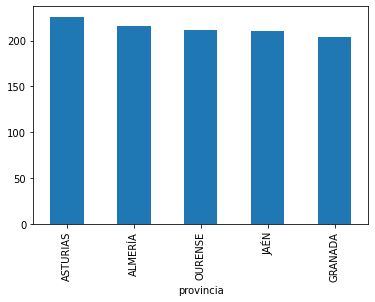

In [127]:
#En este bar chart podemos observar que la diferencia entre los coeficientes de las 5 (e incluso 10) provincias más escarpadas
#son muy similares, con diferencias que apenas pasan los diez puntos porcentuales.

(df_provincias.sort_values('coeficiente', ascending=False).head()['coeficiente']).plot(kind="bar")

<AxesSubplot:>

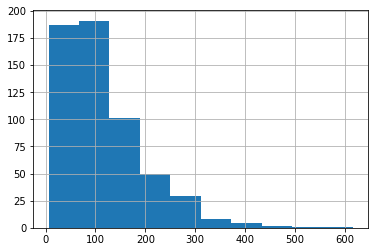

In [119]:
#Histograma de coeficientes, se aprecia una cola relativamente corta ya que los valores extremos son pocos. 

df_puertos.coeficiente.hist()

<AxesSubplot:>

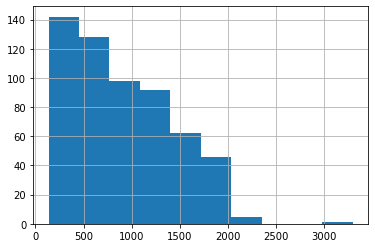

In [121]:
#Distribución curiosamente lineal en el histograma por alturas hasta los 2000m, superados por muy pocos outliers.

df_puertos.altitud.hist()

In [1]:
###FINALIZADO###